In [7]:
import math

def linear(xs, k, b):
    res = []
    for x in xs:
        res.append(k*x + b)
    return res

def sx(xs):
    res = 0
    for x in xs:
        res += x
    return res

def sxx(xs):
    res = 0
    for x in xs:
        res += x**2
    return res

def sxy(xs, ys):
    res = 0
    for i in range(len(xs)):
        res += xs[i] * ys[i]
    return res

def sxxy(xs, ys):
    res = 0
    for i in range(len(xs)):
        res += xs[i]**2 * ys[i]
    return res

def pow_n(xs, n):
    res = 0
    for x in xs:
        res += x**n
    return res

def epsilon(ys1, ys2):
    res = []
    for i in range(len(ys1)):
        res.append(ys1[i] - ys2[i])
    return res

def standard_deviation(eps):
    return sxx(eps)

def square_deviation(eps):
    return math.sqrt(sxx(eps)/len(eps))

def linear_approximation(xs, ys):
    a = (sxy(xs, ys)*len(xs) - sx(xs)*sx(ys))/(sxx(xs)*len(xs) - sx(xs)**2)
    b = (sxx(xs)*sx(ys) - sx(xs)*sxy(xs, ys))/(sxx(xs)*len(xs) - sx(xs)**2)
    return [a, b]

def square_approximation(xs, ys):
    left = np.array([
                     [len(xs), sx(xs), sxx(xs)],
                     [sx(xs), sxx(xs), pow_n(xs, 3)],
                     [sxx(xs), pow_n(xs, 3), pow_n(xs, 4)]
                    ])
    right = np.array([sx(ys), sxy(xs, ys), sxxy(xs, ys)])
    return np.linalg.solve(left, right)

def polynomial_second_degree(xs, a0, a1, a2):
    res = []
    for x in xs:
        res.append(a0*x**2 + a1*x + a2)
    return res

Hello, lab4
Hope, we`ll be friends

Delta H: [8.854153846153846, 35.41661538461538, 53.12492307692307, 61.97907692307692, 88.54153846153845, 106.24984615384614, 132.81230769230768, 159.37476923076923, 177.0830769230769]
delta_h_ex = 48.69784615384615
delta_b_ex = 0.5707125000003205
Delta B: [0.031706250000017804, 0.1902375000001068, 0.317062500000178, 0.475593750000267, 0.634125000000356, 0.7609500000004272, 0.8877750000004985, 0.9828937500005518, 1.0146000000005697]
Delta U: [525.124646634796, 787.688424679758, 875.2077443913263, 1125.2695937503868, 1050.2492932695916, 1050.2492932695918, 980.2332556093113, 904.3808509618493, 840.2011802887505]
Delta p: 0.16536325000005084


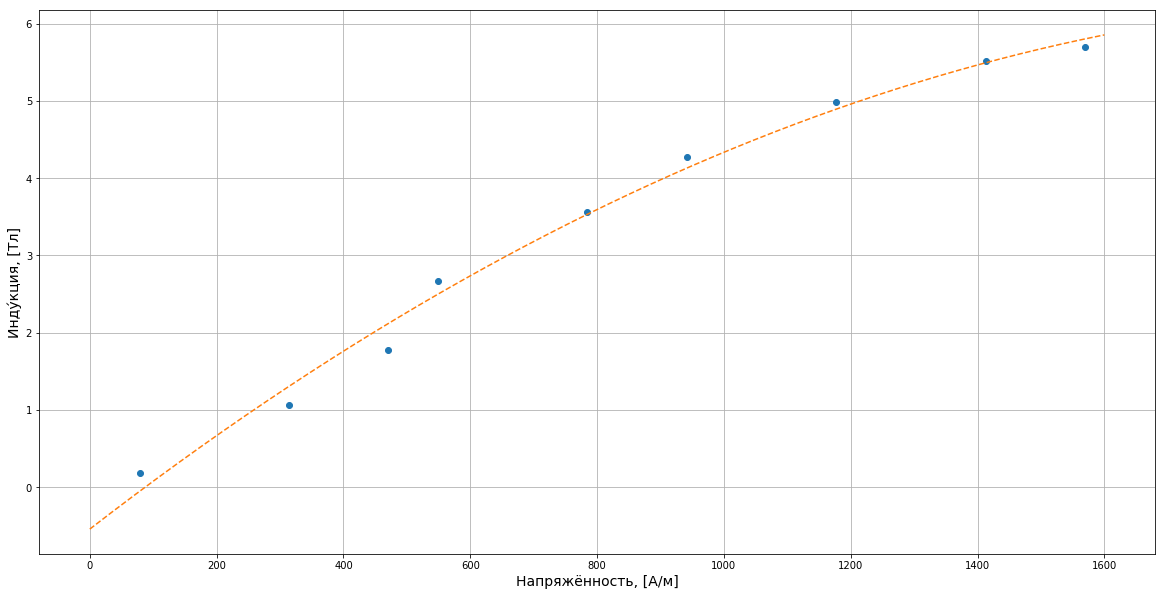

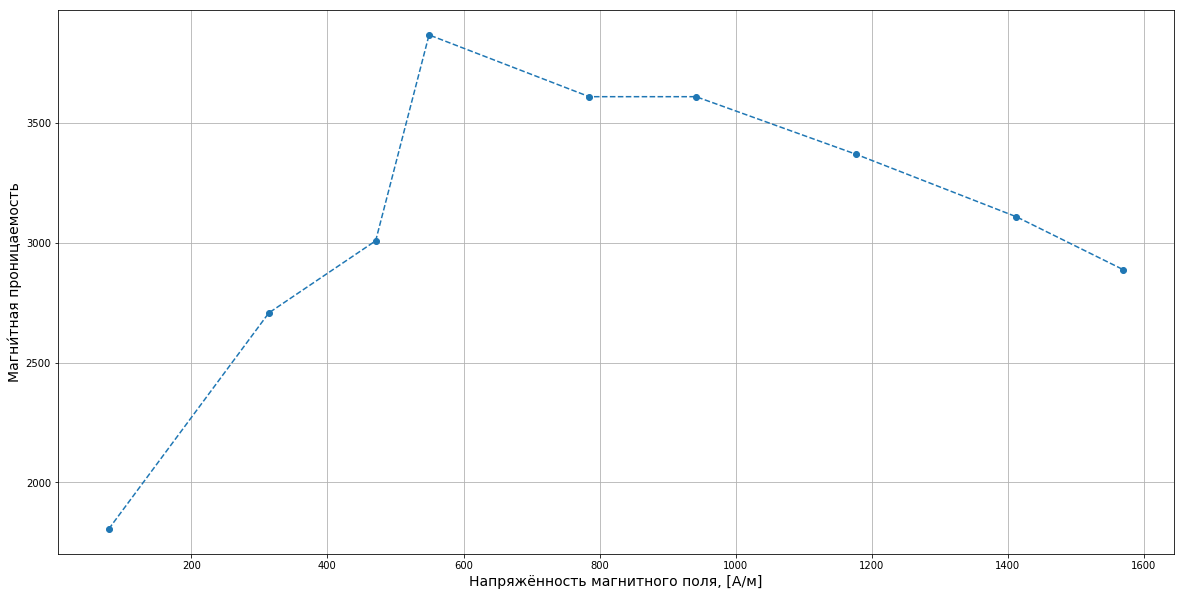

In [28]:
import numpy as np
import matplotlib.pyplot as plt

print("Hello, lab4\nHope, we`ll be friends\n")
# Bm от Hm
h_m = np.array([78.48, 313.92, 470.88, 549.36, 784.8, 941.76, 1177.2, 1412.64, 1569.6])
b_m = np.array([0.178, 1.068, 1.78, 2.67, 3.56, 4.272, 4.984, 5.518, 5.696])
u = np.array([1804.89, 2707.34, 3008.15, 3867.63, 3609.78, 3609.78, 3369.13, 3108.42, 2887.83])

delta_h = [h * ((0.001 / 0.078) + (6.8 / 68)) for h in h_m]
print(f"Delta H: {delta_h}") # TODO занести в док

delta_h_example = 431.64 * ((0.001 / 0.078) + (6.8 / 68))
print(f"delta_h_ex = {delta_h_example}")

delta_b_example = 3.204 * ((47000 / 470000) + (0.47 * 10**-7 / 0.47 * 10**-6) + (0.05 / 0.64))
print(f"delta_b_ex = {delta_b_example}")

delta_b = [b * ((47000 / 470000) + (0.47 * 10**-7 / 0.47 * 10**-6) + (0.05 / 0.64)) for b in b_m]
print(f"Delta B: {delta_b}") # TODO занести в док

delta_u = [u[i] * ((delta_h[i] / h_m[i]) + (delta_b[i] / b_m[i])) for i in range(len(u))]
print(f"Delta U: {delta_u}")

p = 0.50881
delta_p = p * ((5 / 40) + (6.8 / 68) + (47000 / 470000) + (0.47 * 10**-7 / 0.47 * 10**-6))
print(f"Delta p: {delta_p}")

plot_x = np.array(np.arange(0, 1600, step = 0.1))

hm_bm_approx = square_approximation(h_m, b_m)
plt.figure(figsize=(20, 10))
plt.plot(
            h_m, b_m, 'o',
            plot_x, polynomial_second_degree(plot_x, hm_bm_approx[2], hm_bm_approx[1], hm_bm_approx[0]), '--'
         )
         #0.0, epsilon_source, 'yo')
#plt.vlines(i_k, 0, 0.35, linestyle="dashed")
#plt.vlines(p1_max_i, 0, p1_max, linestyle="dashed")
#plt.hlines(p1_max, 0, p1_max_i, linestyle="dashed")
plt.xlabel('Напряжённость, [А/м]', fontsize=14)
plt.ylabel('Инду́кция, [Тл]', fontsize=14)
#ax = plt.gca()
#ax.set_autoscale_on(False)
#ax.axis([0, i_k + 0.0005, 0, 0.4])
plt.grid()
plt.show()


plt.figure(figsize=(20, 10))
plt.plot(
            h_m, u, 'o--',
        )
         #0.0, epsilon_source, 'yo')
#plt.vlines(i_k, 0, 0.35, linestyle="dashed")
#plt.vlines(p1_max_i, 0, p1_max, linestyle="dashed")
#plt.hlines(p1_max, 0, p1_max_i, linestyle="dashed")
plt.xlabel('Напряжённость магнитного поля, [А/м]', fontsize=14)
plt.ylabel('Магни́тная проницаемость', fontsize=14)
#ax = plt.gca()
#ax.set_autoscale_on(False)
#ax.axis([0, i_k + 0.0005, 0, 0.4])
plt.grid()
plt.show()